In [19]:
def get_paths(path):
    all_files_in_path = glob.glob(path+'*')
    image_names = glob.glob(path+'imgs/*')
    image_folder = path+'imgs'

    return all_files_in_path,image_names,image_folder

    
def numeric_string_to_num(string:str):
    try:
        return float(string)
    except:
        return int(-999)
    

def get_data(df,path):
    imgs = []
    metadata = []
    targets = []
    ids = []


    for i,row in df.iterrows():
        
        try:
            name = row.image_id
            img_name = path+'imgs/'+name+'.npy'
            #img_id = name.split('/')[-1]
            img = np.load(img_name)
            metadata_temp = np.array([name,row.Sar_Incidence+0.0000000001,row.sar_type,row.mmsi,row.cog+0.000001,row.sog+0.000001,img.shape])
            target_temp = np.array([int(row.length),int(row.width),row.type])
            
            imgs.append(img)
            metadata.append(metadata_temp)   
            targets.append(target_temp)
            ids.append(name)
            
        except Exception as e:
            pass

    imgs = np.array(imgs)
    
    targets = np.array(targets)
    ids= np.array(ids)

    metadata_df = pd.DataFrame(metadata, columns = ['image_id','Sar_Incidence','sar_type','mmsi','cog','sog','shape'])
    metadata= np.array(metadata)[:,[1,3,4,5]]

    return imgs,metadata,targets,ids,metadata_df




def minmax(array,mini,maxi):
    array = np.array([minmax_one(im,mini,maxi) for im in array])
    return array


def minmax_one(array,mini,maxi):
    co = array[:,:,0]
    co = (co - mini[0]) / ((maxi[0] - mini[0]))
    cross = array[:,:,1]
    cross = (cross - mini[1]) / (maxi[1] - mini[1])
    #array = (array - min) / (max - min)
    #
    array = np.stack((co,cross),axis=-1)
    return array


def zscore(array, mean,std ):
    #z = (X – μ) / σ
    co = array[:,:,:,0]
    co = (co - mean[0]) / std[0]
    cross = array[:,:,:,1]
    cross = (cross - mean[1]) / std[1]
    #array = (array - min) / (max - min)
    #
    array = np.stack((co,cross),axis=-1)
    return array
    

def zscore_meta(array,mean,std):
    array = (array - mean) / std

    return array

def minmax_meta(array,mini,maxi):
    array = (array - mini) / (maxi - mini)

    return array


def Union(list1,list2):
    final_list = list(set().union(list1, list2))
    return final_list

def Difference(list1,list2):
    final_list = list(set().difference(list1, list2))
    return final_list

def remove_index(listing:list):
    listing = np.array([numeric_string_to_num(len) for len in listing])
    return index_of_string_in_list(listing)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import dotenv
import os
import sys
from dotenv import load_dotenv, find_dotenv
#STATIC_DIR = os.getenv('static_dir')
SRC_DIR = os.getenv('src_dir')
DATA_DIR = os.getenv('data_dir')
sys.path.append(SRC_DIR)
sys.path.append(DATA_DIR)


In [3]:
path = DATA_DIR+'/raw/OpenSARShip_3/'

In [4]:
all_files_in_path,image_names,image_folder = get_paths(path)
df = pd.read_csv(all_files_in_path[-1])


imgs,metadata,targets,ids,df_all = get_data(df,path)
df_all_2 = df_all.copy()

targets = targets[:,0:2]
targets= targets.astype(float).astype(int)

/var/folders/82/fwjm77x535gfxv2dlbyp5l400000gp/T/ipykernel_76130/639793171.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  metadata_temp = np.array([name,row.Sar_Incidence+0.0000000001,row.sar_type,row.mmsi,row.cog+0.000001,row.sog+0.000001,img.shape])
/var/folders/82/fwjm77x535gfxv2dlbyp5l400000gp/T/ipykernel_76130/639793171.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imgs = np.array(imgs)


/var/folders/82/fwjm77x535gfxv2dlbyp5l400000gp/T/ipykernel_76130/817099929.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = scipy.stats.mode(targets[:,0]/targets[:,1])[0][0]


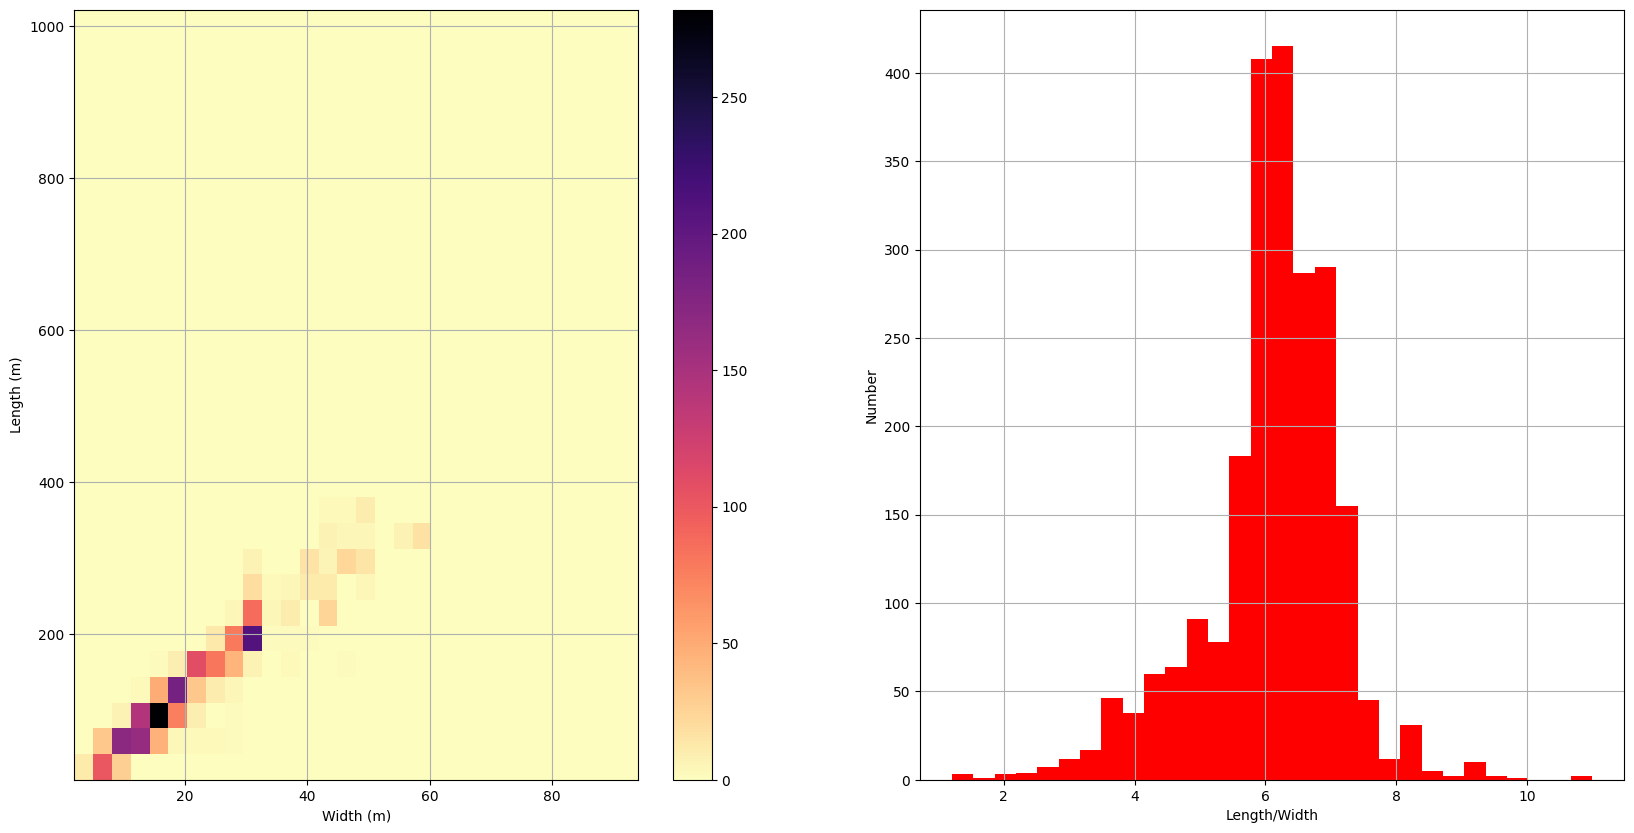

average ratio:  6.0


In [5]:
import scipy.stats
mode = scipy.stats.mode(targets[:,0]/targets[:,1])[0][0]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
h = plt.hist2d(targets[:,1],targets[:,0],bins=30,cmap='magma_r')
plt.xlabel('Width (m)')
plt.ylabel('Length (m)')
plt.grid('minor')
plt.grid('major')
plt.colorbar(h[3], ax=plt.gca())

plt.subplot(1,2,2)
h = plt.hist(targets[:,0]/targets[:,1],bins=30,color='red')
plt.xlabel('Length/Width')
plt.ylabel('Number')
plt.grid('minor')
plt.grid('major')



plt.show()


print('average ratio: ',mode)




In [6]:
shapes = np.array([len(this_shape) for this_shape in df_all['shape'].to_numpy()])
ratio = targets[:,0]/targets[:,1]
ix_ratio = np.where((ratio < 9) & (ratio > 2) & (shapes>2))[0].tolist()


In [7]:
imgs2 = imgs[ix_ratio]
metadata2= metadata[ix_ratio]
targets2 = targets[ix_ratio]
ids2= ids[ix_ratio]

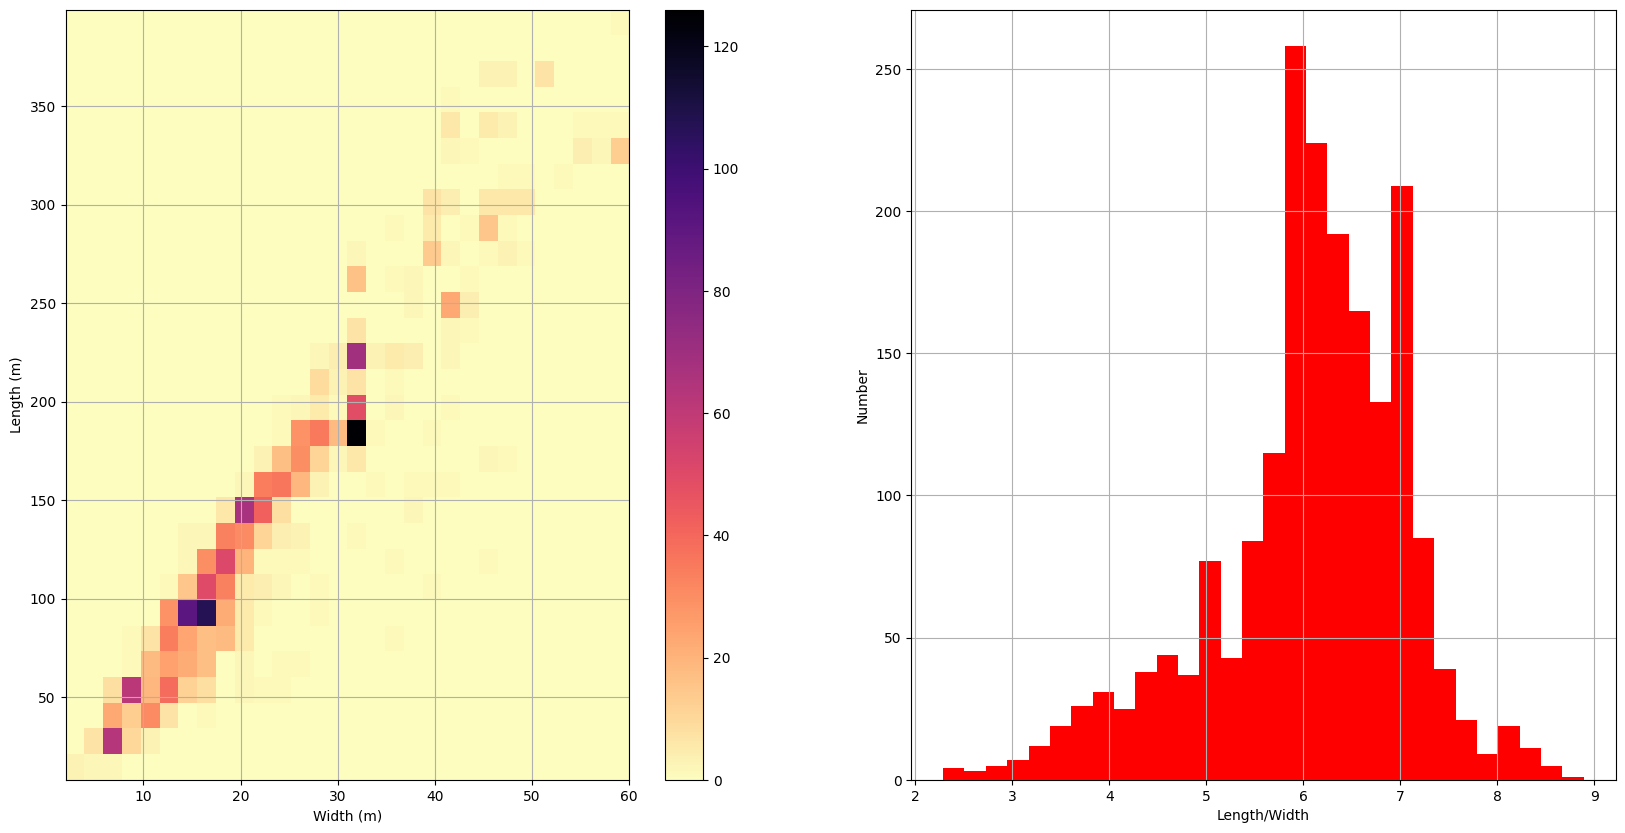

average ratio:  6.0


In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
h = plt.hist2d(targets2[:,1],targets2[:,0],bins=30,cmap='magma_r')
plt.xlabel('Width (m)')
plt.ylabel('Length (m)')
plt.grid('minor')
plt.grid('major')
plt.colorbar(h[3], ax=plt.gca())

plt.subplot(1,2,2)
h = plt.hist(targets2[:,0]/targets2[:,1],bins=30,color='red')
plt.xlabel('Length/Width')
plt.ylabel('Number')
plt.grid('minor')
plt.grid('major')



plt.show()


print('average ratio: ',mode)





In [9]:
df_all_2 = df_all_2[df_all_2.image_id.isin(ids2)]

In [10]:
length = len(ids2)
index = np.linspace(0,length-1,length).astype(int)
np.random.seed(42)
np.random.shuffle(index) 

training_index = index[0:int(length*0.8)]
testing_index = index[int(length*0.8):]

In [11]:
imgs_training = imgs2[training_index]
metadata_training = metadata2[training_index]
targets_training  =targets2[training_index]
ids_training =ids2[training_index]

In [12]:
imgs_testing = imgs2[testing_index]
metadata_testing = metadata2[testing_index]
targets_testing  =targets2[testing_index]
ids_testing =ids2[testing_index]

In [13]:
imgs_training_clipped = imgs_training.copy()
imgs_testing_clipped = imgs_testing.copy()


In [14]:
#mean_12_vv = np.mean(np.array([np.mean(im[:,:,0]) for im in imgs_training_clipped]))
#mean_12_vh = np.mean(np.array([np.mean(im[:,:,1]) for im in imgs_training_clipped]))


min_12_vv = np.min(np.array([np.min(im[:,:,0]) for im in imgs_training_clipped]))
min_12_vh = np.min(np.array([np.min(im[:,:,1]) for im in imgs_training_clipped]))

max_12_vv = np.max(np.array([np.max(im[:,:,0]) for im in imgs_training_clipped]))
max_12_vh = np.max(np.array([np.max(im[:,:,1]) for im in imgs_training_clipped]))


minimum_values= np.array([min_12_vv,min_12_vh])
maximum_values = np.array([max_12_vv,max_12_vh])


In [15]:
targets_training = np.hstack((targets_training[:,0:2],np.expand_dims((targets_training[:,0]/targets_training[:,1]),axis=-1)))
targets_testing = np.hstack((targets_testing[:,0:2],np.expand_dims((targets_testing[:,0]/targets_testing[:,1]),axis=-1)))

In [16]:

minimum_values_targets= np.min(targets_training[:,0:3],axis=(0))
maximum_values_targets = np.max(targets_training[:,0:3],axis=(0))


metadata_training_minimum_values= np.min(metadata_training,axis=(0))
metadata_training_maximum_values = np.max(metadata_training,axis=(0))



In [26]:
imgs_training_clipped_scaled = minmax(imgs_training_clipped,minimum_values,maximum_values)
imgs_testing_clipped_scaled = minmax(imgs_testing_clipped,minimum_values,maximum_values)

metadata_training_scaled = minmax_meta(metadata_training,metadata_training_minimum_values,metadata_training_maximum_values)
metadata_testing_scaled = minmax_meta(metadata_testing,metadata_training_minimum_values,metadata_training_maximum_values)


targets_training_scaled = minmax_meta(targets_training[:,0:3],minimum_values_targets,maximum_values_targets)
targets_testing_scaled = minmax_meta(targets_testing[:,0:3],minimum_values_targets,maximum_values_targets)

/var/folders/82/fwjm77x535gfxv2dlbyp5l400000gp/T/ipykernel_76130/1002175457.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array([minmax_one(im,mini,maxi) for im in array])


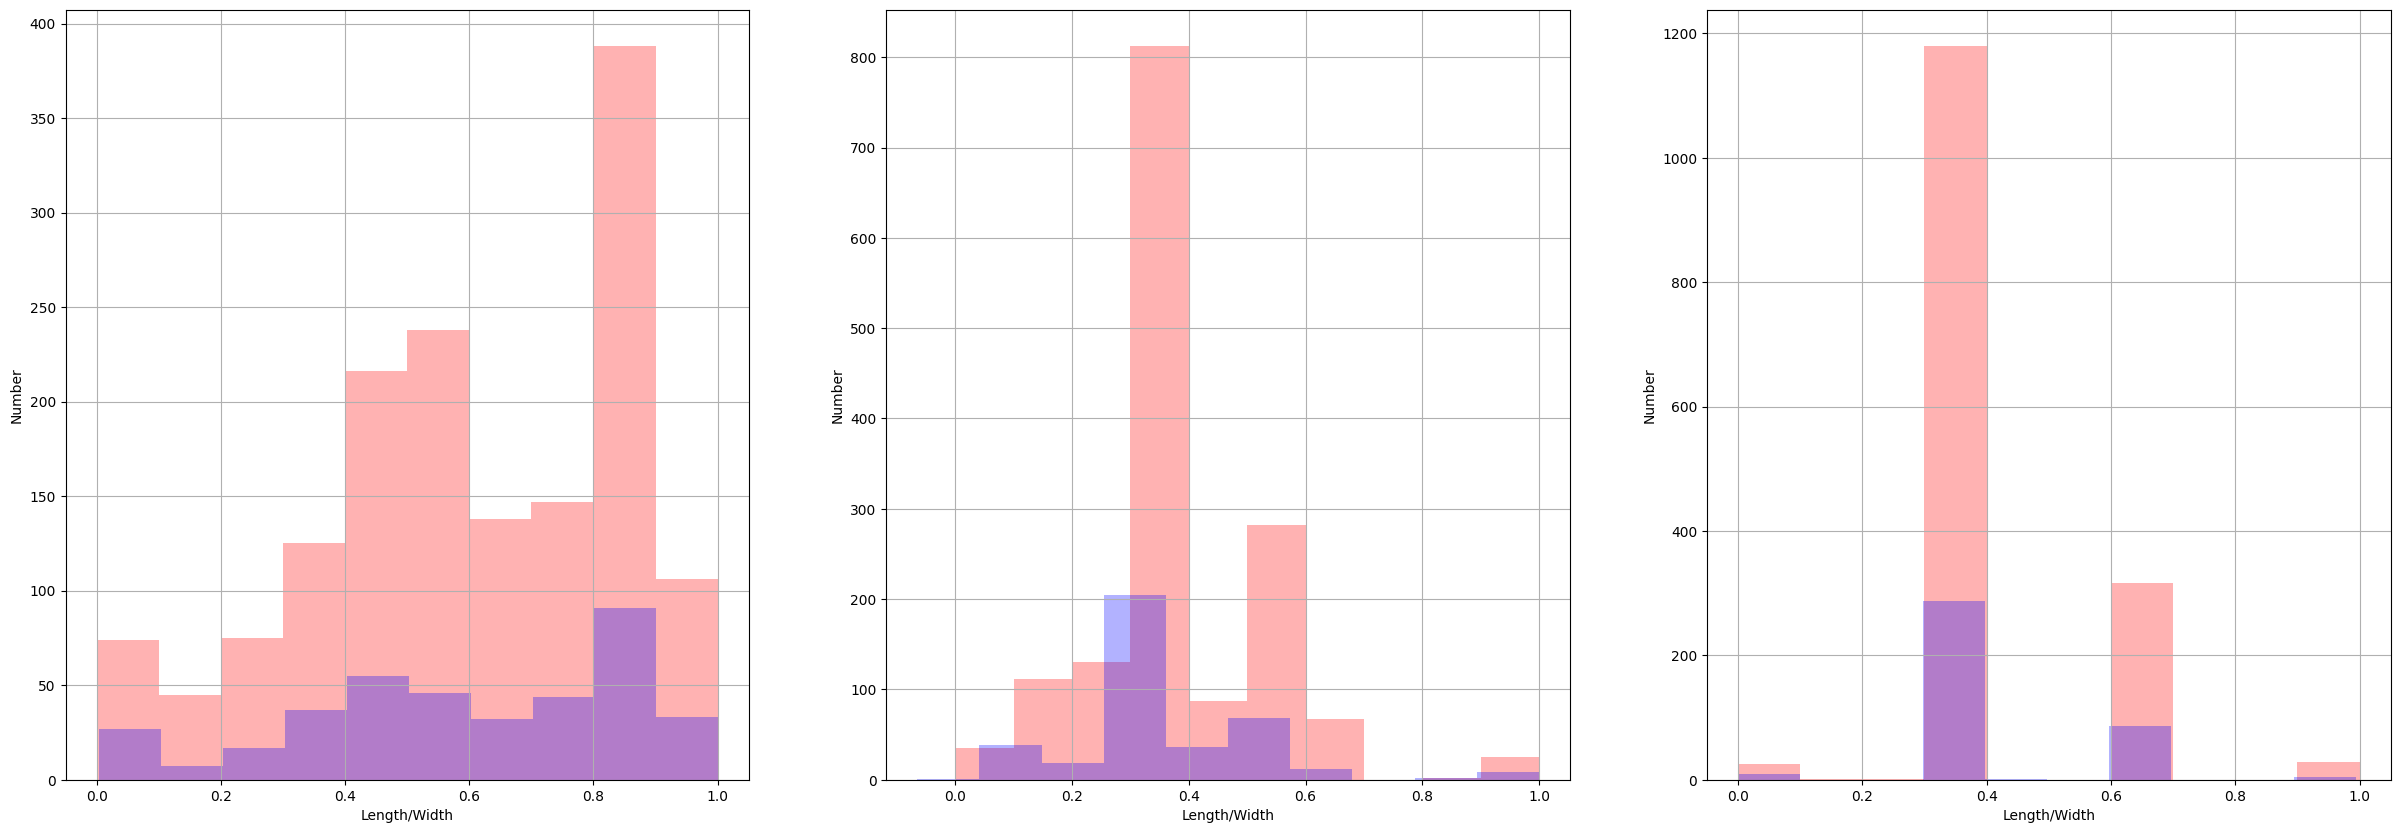

In [62]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
h = plt.hist(metadata_training_scaled[:,0],bins=10,color='red',alpha=0.3)
h = plt.hist(metadata_testing_scaled[:,0],bins=10,color='blue',alpha=0.3)
plt.xlabel('Length/Width')
plt.ylabel('Number')
plt.grid('minor')
plt.grid('major')


plt.subplot(1,3,2)
h = plt.hist(metadata_training_scaled[:,1],bins=10,color='red',alpha=0.3)
h = plt.hist(metadata_testing_scaled[:,1],bins=10,color='blue',alpha=0.3)
plt.xlabel('Length/Width')
plt.ylabel('Number')
plt.grid('minor')
plt.grid('major')


plt.subplot(1,3,3)
h = plt.hist(metadata_training_scaled[:,2],bins=10,color='red',alpha=0.3)
h = plt.hist(metadata_testing_scaled[:,2],bins=10,color='blue',alpha=0.3)
plt.xlabel('Length/Width')
plt.ylabel('Number')
plt.grid('minor')
plt.grid('major')

plt.show()



In [64]:
!pwd

/Users/kaaso/Documents/phd/coding/Deep Quantile Regression Synthetic Aperture Radar Ship Size/notebooks


In [ ]:
'''

'''

#outfile = TemporaryFile()
np.savez('openSARship_train_test_norm.npz', 
         imgs_training_clipped_scaled=imgs_training_clipped_scaled, 
         imgs_testing_clipped_scaled=imgs_testing_clipped_scaled,
         
         metadata_testing_scaled = metadata_testing_scaled,
         metadata_training_scaled = metadata_training_scaled,
         
         targets_testing_scaled = targets_testing_scaled,
         targets_training_scaled = targets_training_scaled,
         

         
         
         minimum_values= minimum_values,
         metadata_training_minimum_values=metadata_training_minimum_values,
         minimum_values_targets=minimum_values_targets,
         maximum_values=maximum_values,
         metadata_training_maximum_values=metadata_training_maximum_values,
         maximum_values_targets=maximum_values_targets,
    
         training_index = training_index,
         testing_index = testing_index,
         
         ids_training =ids_training,
         ids_testing = ids_testing,

         dataframe = df_all_2
        )
#_ = outfile.seek(0)
#npzfile = np.load(outfile)
#sorted(npzfile.files)


